In [16]:
import pandas as pd

In [17]:
FILE_PATH = "./chat.csv"
raw_df = pd.read_csv(FILE_PATH)

In [19]:
raw_df.columns

Index(['Date', 'User', 'Message'], dtype='object')

In [20]:
raw_df.loc[:,['Date','Message']].sample(3)

,Date,Message
27233,2024-03-25 23:10:49,세상이미쳐돌아가는구나아주
40121,2024-03-28 23:02:42,네
61167,2024-04-02 22:35:36,다른 분이


In [21]:
from KakaoTalkAnalysis import GeneralPreproc
general_controller = GeneralPreproc(raw_df)

In [22]:
# 전체 chatting 데이터
total_df = general_controller()

# n개 이상의 chat이 있는 유저 데이터
filtered_df = general_controller(300)

In [23]:
from KakaoTalkAnalysis import EdaController

eda_controller = EdaController()

In [24]:
total_info_dict = eda_controller.info_dict(total_df)
eda_controller.info_print(total_df)

start_date : 2024-03-15 08:02
end_date   : 2024-04-05 10:09
total_user : 48
total_talk : 67413


In [25]:
filtered_info_dict = eda_controller.info_dict(filtered_df)
eda_controller.info_print(filtered_df)

start_date : 2024-03-15 08:02
end_date   : 2024-04-05 10:09
total_user : 25
total_talk : 66102


In [26]:
from KakaoTalkAnalysis import StatsController
from KakaoTalkAnalysis import Visualizer

stats_controller = StatsController(filtered_df)

In [27]:
# Chatting 비율
ucr_df = stats_controller.user_chat_ratio(5)
ucr_df.head()

# chatting length 비율
ulr_df = stats_controller.user_len_ratio(5)
ulr_df.head()

# Argument 비율
arg_df = stats_controller.user_arg_ratio('ㅋㅋ')
arg_df.head()

,ratio
User,
Honey,0.099635
검볼,0.166156
김커중,0.082703
네모네모고먐미,0.021661
노루,0.027540


In [28]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "AppleGothic"

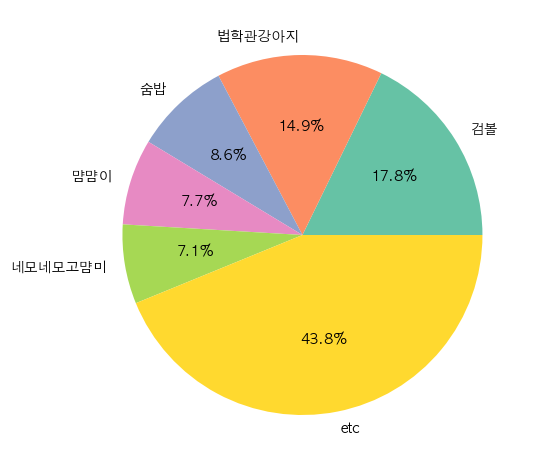

In [29]:
Visualizer.draw_pieplot(ucr_df)

In [30]:
arg = 'Emoticon'

arg_ratio = stats_controller.user_arg_ratio(arg)
arg_ratio.head()

,ratio
User,
Honey,0.046173
검볼,0.001702
김커중,0.049189
네모네모고먐미,0.061584
노루,0.011628


In [31]:
from KakaoTalkAnalysis import SessionPreproc
from KakaoTalkAnalysis import RelationController

session_preproc = SessionPreproc(filtered_df)
session_df = session_preproc.cluster_bsd_session()

relation_ctr = RelationController(session_df)

In [33]:
abs_score = relation_ctr.calc_abs_score()
rel_score = relation_ctr.calc_rel_score()

score_df = relation_ctr.format_score(abs_score, rel_score)
score_df.sample(3)

,subject,object,abs_score,rel_score,score
186,법학관강아지,칭찬맨,0.138393,0.632653,0.771046
187,법학관강아지,손번무,0.102679,0.657143,0.759821
55,푸,응앗,0.441176,0.528169,0.969345


In [34]:
from KakaoTalkAnalysis import NaverAIExtractor, SentimentalController

naver_ai_private = {
    "client_id": "client_id",
    "client_secret": "client_secrete",
    "content_type": "application/json",
}
# from private import naver_ai_private

naver_ai_extractor = NaverAIExtractor(naver_ai_private)

In [35]:
session_talk = (
    session_df
    .groupby(by=["session"], as_index=False)
    ["Message"]
    .agg(" ".join)
    )

In [36]:
# sentimental_dict = {}
# summary_dict = {}
# for idx, row in session_talk.iterrows():
#     content = row["Message"]

#     sentimental_resp = naver_ai_extractor.extract_sentimental(content)
#     sentimental_dict[row["session"]] = sentimental_resp

#     summary_resp = naver_ai_extractor.extract_summary(content)
#     summary_dict[row["session"]] = summary_resp

import pickle

with open("./sentimental_dict.pkl", "rb") as f:
    sentimental_dict = pickle.load(f)

# with open("./summary_dict.pkl", "rb") as f:
#     summary_dict = pickle.load(f)

In [38]:
sentimental_ctr = SentimentalController(session_df, sentimental_dict)

sentimental_total_ratio = sentimental_ctr.calc_total_ratio()
sentimental_total_ratio

sentimental_user_ratio = sentimental_ctr.calc_user_ratio()
sentimental_user_ratio.div(sentimental_total_ratio).sample(3)

,negative,positive,neutral
User,,,
칭찬맨,1.027737,1.056928,0.872616
물약군,0.874000,1.179625,1.140672
명자,1.040768,0.804471,1.091820
